# ___Do specific words evoke certain emotions?___

## 0.0 Importing Libraries and Loading Data

The dataset used in this project is available at https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data. The name of the file to download is text.csv. This dataset should already be saved as emotions.csv in the repository.

</br>

You must also install the spaCy library and the English language model within it. This can be done via:
- !pip install -U pip setuptools wheel
- !pip install -U spacy
- !python -m spacy download en_core_web_sm

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

emotions = pd.read_csv("emotions.csv")

### 1.0 Dataset Overview

In [2]:
emotions.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


Each entry in this dataset consists of a Twitter message and a corresponding label indicating the predominant emotion evoked by the message. 

The emotions are classified into six categories: 
- <span style="color: blue; font-weight: bold;">Sadness</span> (0)
- <span style="color: green; font-weight: bold;">Joy</span> (1) 
- <span style="color: pink; font-weight: bold;">Love</span> (2) 
- <span style="color: red; font-weight: bold;">Anger</span> (3
- <span style="color: gray; font-weight: bold;">Fear</span> (4)
- <span style="color: orange; font-weight: bold;">Surprise</span> (5).

### 1.1 Dataset Frequencies

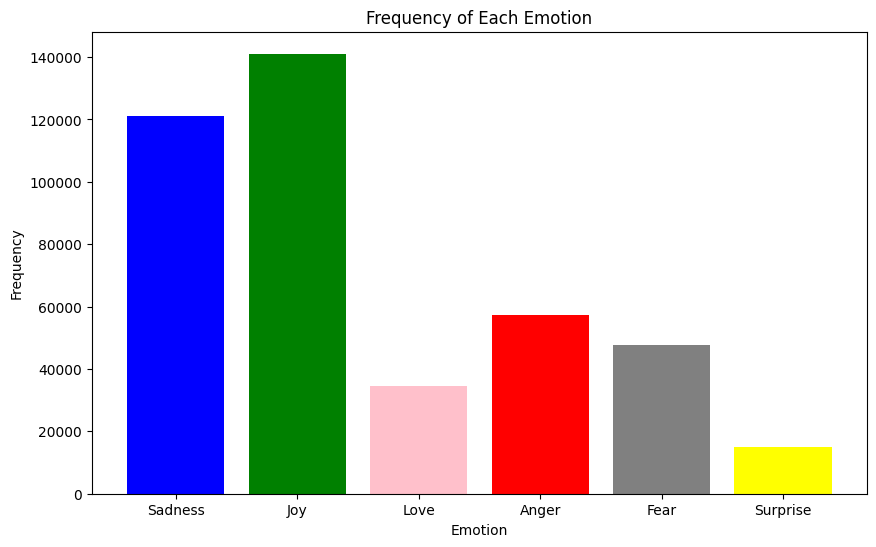

In [11]:
emotion_counts = emotions['label'].value_counts().sort_index()

emotion_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
colors = ['blue', 'green', 'pink', 'red', 'grey', 'yellow']


plt.figure(figsize=(10, 6))
plt.bar(emotion_labels, emotion_counts, color=colors)
plt.title('Frequency of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

<span style="color: green; font-weight: bold;">Joy</span> is the leading emotion in the dataset, followed by <span style="color: blue; font-weight: bold;">Sadness</span>, <span style="color: red; font-weight: bold;">Anger</span>, <span style="color: gray; font-weight: bold;">Fear</span>, <span style="color: pink; font-weight: bold;">Love</span>, and <span style="color: orange; font-weight: bold;">Surprise</span> being the least expressed emotion in the dataset.

## So do specific words evoke certain emotions? The answer to this question is indeed yes, why?
### The answer to this question is indeed yes, why?

### 2.1 Emotional Frequencies for Specific Words

Emotion percentages for the word 'sad':
Sadness     56.930215
Joy         14.111734
Love         5.142084
Anger       13.183839
Fear         7.442490
Surprise     3.189639
Name: count, dtype: float64


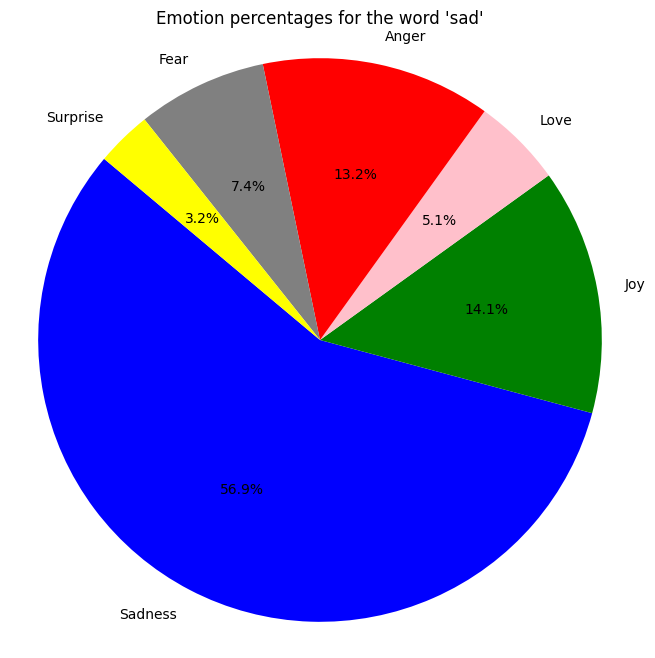

In [12]:
emotion_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']

def calculate_emotion_percentage(word):

    filtered_df = emotions[emotions['text'].str.contains(word, case=False)]
    
    emotion_counts = filtered_df['label'].value_counts().sort_index()
    
    total_rows = len(filtered_df)

    emotion_percentages = (emotion_counts / total_rows) * 100
    emotion_percentages.index = [emotion_labels[label] for label in emotion_percentages.index]
    
    return emotion_percentages

word = "sad"
percentages = calculate_emotion_percentage(word)
print("Emotion percentages for the word '{}':".format(word))
print(percentages)

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Emotion percentages for the word '{}'".format(word))
plt.axis('equal') 
plt.show()

This is a pie chart that represents the percentage of each emotion invoked by the word 'sad'.

As you can see, Approximately 56.9% of the times that the word 'sad' appears in the dataset, it invokes the Sadness emotion, which makes sense given the word.

</br>

Here are more pie charts for words that match each category:


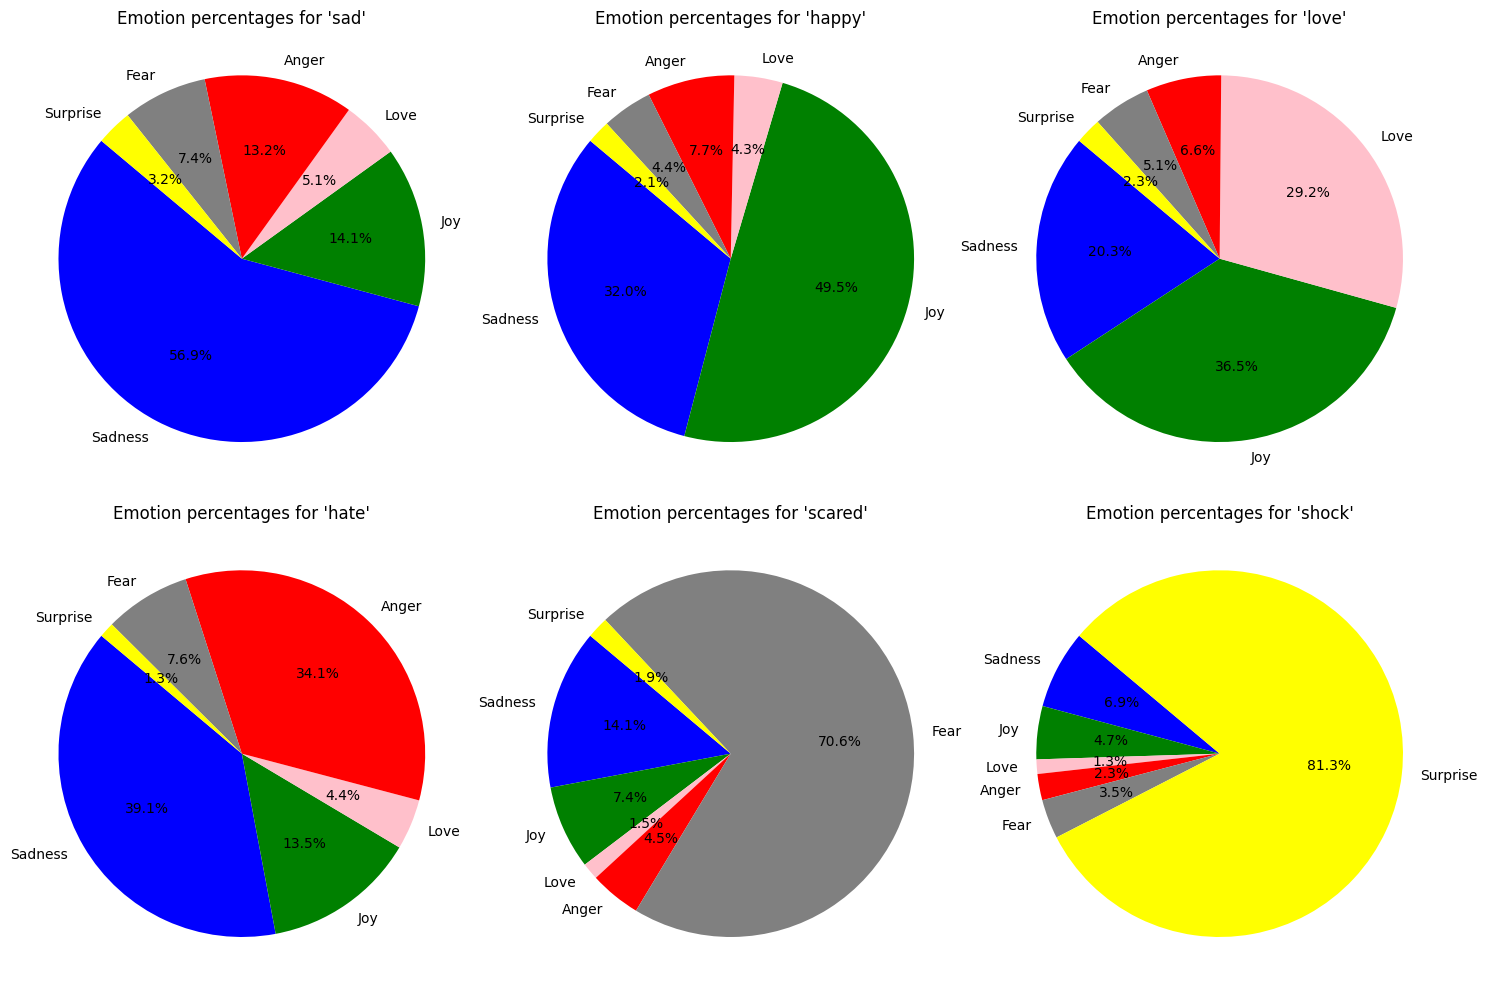

In [13]:
words = ["sad", "happy", "love", "hate", "scared", "shock"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()

for i, word in enumerate(words):
    percentages = calculate_emotion_percentage(word)
    
    axs[i].pie(percentages, labels=percentages.index, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title("Emotion percentages for '{}'".format(word))
    axs[i].axis('equal') 

plt.tight_layout()
plt.show()

### 2.2 Identifying Key Words

Key words are 6 words that evoke the highest percentage of each emotion.

These words are:

- '<span style="color: blue; font-weight: bold;">lonely</span>' for sadness
- '<span style="color: green; font-weight: bold;">confident</span>' for joy
- '<span style="color: pink; font-weight: bold;">generous</span>' for love
- '<span style="color: red; font-weight: bold;">angry</span>' for anger
- '<span style="color: gray; font-weight: bold;">nervous</span>' for fear
- '<span style="color: orange; font-weight: bold;">weird</span>' for surprise

</br>

Here is how I found these words:

In [22]:
nlp = spacy.load("en_core_web_sm")

def is_noun(word):
    
    doc = nlp(word)
    
    return any(token.pos_ == "NOUN" for token in doc)

def is_adjective(word):
    
    doc = nlp(word)
    
    for token in doc:
        if token.pos_ == "ADJ":       
            return True
        
    return False

emotion_labels = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

word_counts = emotions['text'].str.split().explode().str.lower().value_counts()
common_words = word_counts[(word_counts / len(emotions) >= 0.005) & (word_counts.index.str.len() >= 3)].index

max_percentage = [0,0,0,0,0,0]
max_word = ["","","","","",""]

for word in common_words:
    
    if (is_noun(word) == False and is_adjective(word) == False):
        continue
        
    else:
        percentages = calculate_emotion_percentage(word)
        
        if not any(int(percentage) == 100 for percentage in percentages):

                for i in range(0,6):
                    if percentages[i] > max_percentage[i]:
                        max_percentage[i] = percentages[i]
                        max_word[i] = word
        else:
            continue

print(max_word)

/tmp/ipykernel_536971/3757342949.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if percentages[i] > max_percentage[i]:
/tmp/ipykernel_536971/3757342949.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_percentage[i] = percentages[i]


['lonely', 'confident', 'generous', 'angry', 'nervous', 'weird']


For this, I had to import spaCy, which is a open library for Natural Library Processing. I imported this to check whether a word is a noun or an adjective, otherwise the key words wouldbe filler words like 'okay' and 'the'.

</br>

Here are the pie charts for the key words:

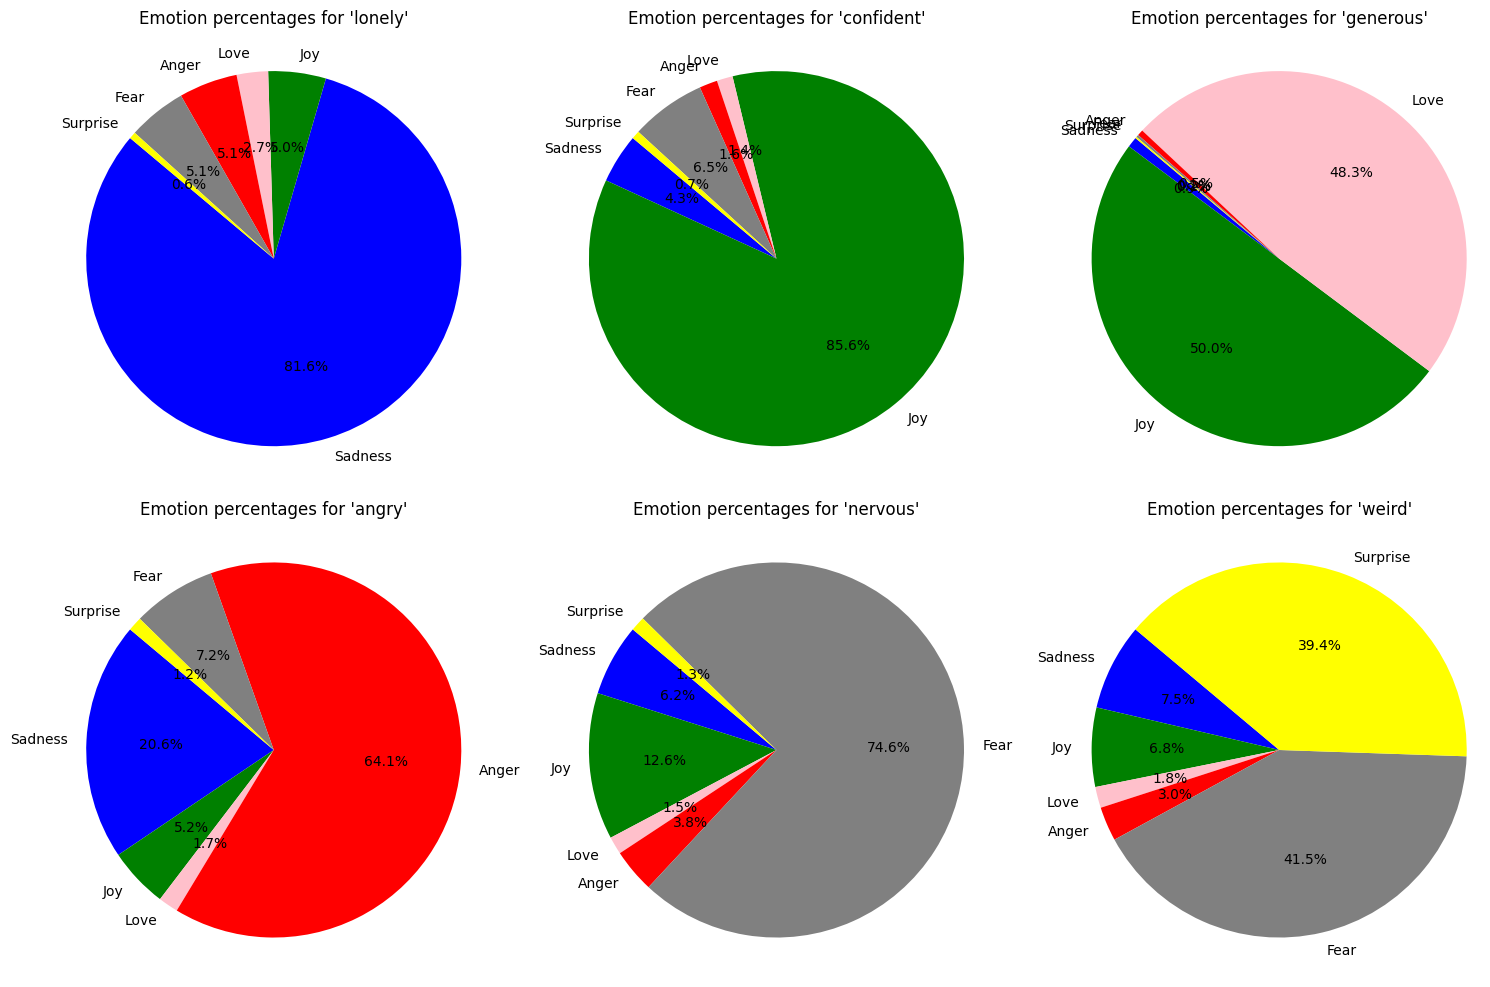

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()

for i, word in enumerate(max_word):
    percentages = calculate_emotion_percentage(word)
    
    axs[i].pie(percentages, labels=percentages.index, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title("Emotion percentages for '{}'".format(word))
    axs[i].axis('equal')

plt.tight_layout() 
plt.show()

### 2.3 Context of Key Words

Now we have key words, but words are just words, it's the context of which it is used that matters. 


</br>

I have made a function that prints random tweets that contain a certain word.

Let's look at some tweets that contain our key word '<span style="color: blue; font-weight: bold;">lonely</span>':

In [8]:
def print_random_messages(word):
    
    filtered_rows = emotions[emotions['text'].str.contains(word, case=False)]
    
    if filtered_rows.empty:
        print(f"No Twitter messages found containing the word '{word}'.")
        return
    
    random_messages = filtered_rows.sample(min(5, len(filtered_rows)))

    for index, row in random_messages.iterrows():
        print(row['text'] + "\n")


word = "lonely"
print_random_messages(word)

i do love the idea of having slave brothers but not at expense that i feel ignored lonely and frustrated and so depressed

i didnt like the feeling it left me feeling so lonely and confused which in turn left me pulling away more

i feel so lonely hahah

i get the feeling jcvd could really relate to this rather lonely guy too

i am lonely or feel worthless



### 3.1 Visualizing Correlation between Words and Emotions

We will now mathematically prove that words do evoke certain emotions using the seaborn heatmap to look at coefficients between words and emotions.

</br>

Here is the heatmap:

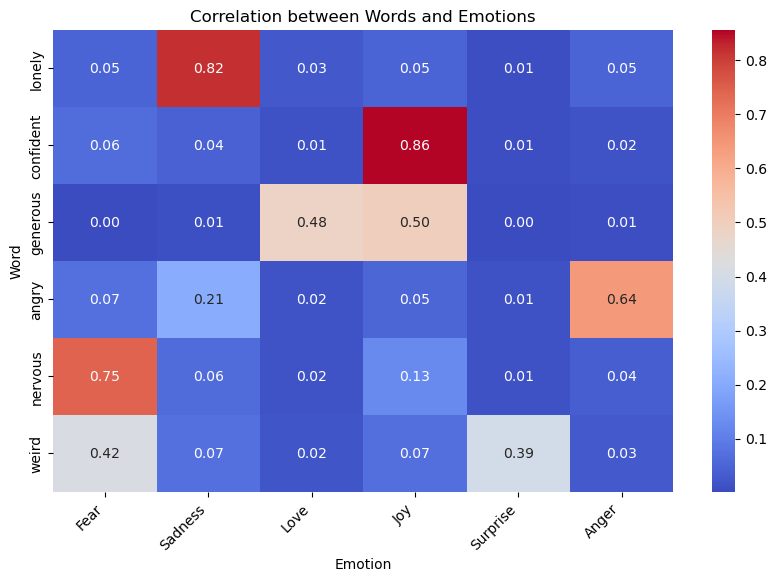

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_table = pd.DataFrame(index=max_word, columns=emotions['label'].unique())

for word in max_word:
    filtered_df = emotions[emotions['text'].str.contains(word, case=False)]
    
    emotion_counts = filtered_df['label'].value_counts(normalize=True)
    
    correlation_table.loc[word] = emotion_counts

correlation_table = correlation_table.apply(pd.to_numeric)

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_table, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

emotion_labels = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
heatmap.set_xticklabels([emotion_labels[label] for label in correlation_table.columns], rotation=45, ha='right')

plt.title('Correlation between Words and Emotions')
plt.xlabel('Emotion')
plt.ylabel('Word')
plt.show()

As you can see, the words '<span style="color: blue; font-weight: bold;">lonely</span>' and '<span style="color: green; font-weight: bold;">confident</span>' have an extremely high correlation for <span style="color: blue; font-weight: bold;">Sadness</span> and <span style="color: green; font-weight: bold;">Joy</span>, respectively.

This matches up to what we saw in their pie charts.

</br>

However, the words '<span style="color: pink; font-weight: bold;">generous</span>' and '<span style="color: orange; font-weight: bold;">weird</span>' have a very low correlation for <span style="color: pink; font-weight: bold;">Love</span> and <span style="color: orange; font-weight: bold;">Surprise</span> relatively.

This also matches up to what we saw in their pie charts.

</br>

This discrepancy in correlations could possibly be due to the emotion being vague, and that words that evoke the emotion of <span style="color: pink; font-weight: bold;">Love</span> could also evoke the emotion of <span style="color: green; font-weight: bold;">Joy</span>.

- For example: the word '<span style="color: pink; font-weight: bold;">generous</span>' has a higher correlation with <span style="color: green; font-weight: bold;">Joy</span> than it does with <span style="color: pink; font-weight: bold;">Love</span>. 

- Similarly, the word '<span style="color: orange; font-weight: bold;">weird</span>' has a higher correlation with <span style="color: gray; font-weight: bold;">Fear</span> than it does with <span style="color: orange; font-weight: bold;">Surprise</span>.

</br>

So yes, certain words do evoke certain emotions, however some emotions may not be directly correlated with words used.

### 4.1 Emotion Classification Model based on Character & Word Count

Accuracy for Fear: 0.88
Accuracy for Sadness: 0.71
Accuracy for Love: 0.92
Accuracy for Joy: 0.66
Accuracy for Surprise: 0.96
Accuracy for Anger: 0.86


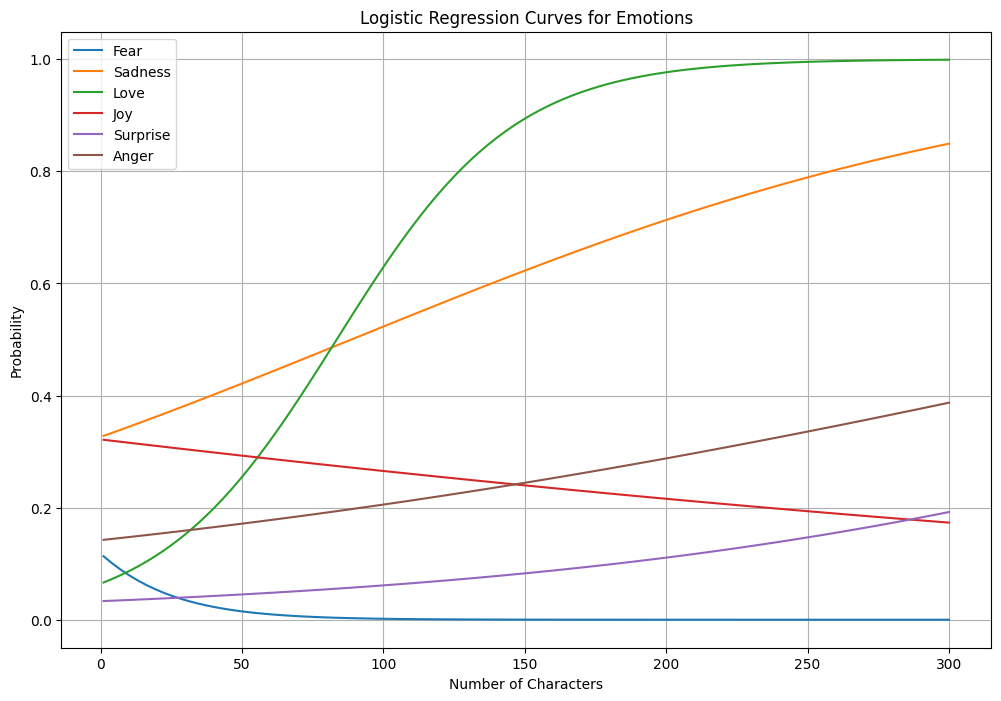

In [24]:
emotions['num_characters'] = emotions['text'].apply(len)
emotions['num_words'] = emotions['text'].apply(lambda x: len(x.split()))

emotions = emotions[emotions['num_characters'] <= 300]

# Split the dataset into features (X) and labels (y)
X = emotions[['num_characters', 'num_words']]
y = emotions['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression models for each emotion
emotion_models = {}
for emotion in y.unique():

    model = LogisticRegression()
    
    model.fit(X_train, (y_train == emotion))

    emotion_models[emotion] = model

# Evaluate the models using the testing data
accuracies = {}
for emotion, model in emotion_models.items():

    y_pred_proba = model.predict_proba(X_test)[:, 1] 
    
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    accuracy = np.mean(y_pred == (y_test == emotion))
    
    accuracies[emotion] = accuracy

label_to_emotion = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}

for emotion_id, accuracy in accuracies.items():
    emotion_name = label_to_emotion[emotion_id]
    print(f"Accuracy for {emotion_name}: {accuracy:.2f}")
    
plt.figure(figsize=(12, 8))
for emotion, model in emotion_models.items():
    # Extract coefficients
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    
    # Plot logistic regression curve
    x_values = np.linspace(X.min().min(), X.max().max(), 100)
    y_values = 1 / (1 + np.exp(-(coef[0] * x_values + coef[1] * x_values + intercept)))
    plt.plot(x_values, y_values, label=emotion)
    
plt.xlabel('Number of Characters')
plt.ylabel('Probability')
plt.title('Logistic Regression Curves for Emotions')
plt.legend(["Fear","Sadness","Love","Joy","Surprise","Anger"])
plt.grid(True)
plt.show()

This model predicts the emotion of a Tweet based on its number of characters and words in the message.

The model predicts that the more characters in a Tweet, the more likely the message will evoke the <span style="color: pink; font-weight: bold;">Love</span> emotion, and the least likely it is to evoke the <span style="color: gray; font-weight: bold;">Fear</span> emotion.

# ___Summary___

## Overview:
This project explores the relationship between specific words and the emotions they evoke in Twitter messages. By analyzing a dataset containing Twitter messages labeled with predominant emotions, we investigate whether certain words are associated with particular emotions.

## Sections:

### Importing Data and Necessary Libraries
- Installed necessary Python libraries
- Imported necessary Python modules
- Read dataset via pandas
  
### Data Visualization:
- Examined the emotions dataset from Kaggle.
- Visualized the frequency of each emotion in the dataset.

### Key Words:
- Identified key words associated with each emotion.
- Created pie charts to illustrate the percentage of each emotion invoked by these key words.
- Looked at Twitter messages containing the word 'lonely' to gather context.

### Heatmap:
- Looked at a heatmap to discover correlations between Key Words and the 6 emotions.

### Logistic Regression Model:
- Trained a logistic regression model to predict the emotion of a Twitter message based on character and word counts.
- Evaluated the model's performance.

## Conclusion:
This project demonstrates that specific words do indeed evoke certain emotions. By utilizing mathematical tools and machine learning models, we gain further insights into the nuanced relationship between word choice and the emotions that they invoke. Understanding of this dynamic can greatly enhance our communication in social media in the future, and it is important to do so.